<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371 Homework 1

### Problem 0 (3 points)

## Part 1: Polynomial Fitting 

In [1]:
import numpy as np
from itertools import combinations_with_replacement as combos


def monomials(d, k):
    c = np.array(list(combos(range(d + 1), k)))
    m = np.zeros((c.shape[0], d))
    for j in range(d):
        m[:, j] = np.sum(c == j, axis=1)
    order = np.argsort(np.sum(m, axis=1))
    return m[order]

### Problem 1.1 (Exam Style Except for the Code)

$
r=\binom{d+k}{k} \\~\\
$

In [2]:
d_array = []
k_array = []
for i in range(0, 16): 
    d_array.append(i)
for i in range(0, 9): 
    k_array.append(i)

    

In [3]:
import math 

combinations = []
for d in d_array: 
    cur_row = []
    for k in k_array: 
        cur_row.append(math.comb(d + k, k))
    combinations.append(cur_row)
np.array(combinations)

array([[     1,      1,      1,      1,      1,      1,      1,      1,
             1],
       [     1,      2,      3,      4,      5,      6,      7,      8,
             9],
       [     1,      3,      6,     10,     15,     21,     28,     36,
            45],
       [     1,      4,     10,     20,     35,     56,     84,    120,
           165],
       [     1,      5,     15,     35,     70,    126,    210,    330,
           495],
       [     1,      6,     21,     56,    126,    252,    462,    792,
          1287],
       [     1,      7,     28,     84,    210,    462,    924,   1716,
          3003],
       [     1,      8,     36,    120,    330,    792,   1716,   3432,
          6435],
       [     1,      9,     45,    165,    495,   1287,   3003,   6435,
         12870],
       [     1,     10,     55,    220,    715,   2002,   5005,  11440,
         24310],
       [     1,     11,     66,    286,   1001,   3003,   8008,  19448,
         43758],
       [     1,     1

### Problem 1.2

In [4]:
import math
x = np.array([0.5, -0.2, 0.1])
d, k = len(x), 2

def evaluate_monomials(p, x):
    vector = []
    for monomial in p: 
        cur_product = 1
        for col in range(0, len(x)): 
            cur_product *= math.pow(x[col], monomial[col])
        vector.append(cur_product)
    return np.array(vector)

final_vector = evaluate_monomials(monomials(d, k), x)
print(final_vector)

assert (len(final_vector) == math.comb(d + k, k))


[ 1.    0.5  -0.2   0.1   0.25 -0.1   0.05  0.04 -0.02  0.01]


### Problem 1.3 (Exam Style if Table is Provided)

In [5]:
c = np.linspace(2, 0, 35)

The length of c is 35 coefficients 

$
d=3,k=4
$

$
\binom{d+k}{k} = \binom{7}{4} = 35
$

### Problem 1.4

In [6]:
x = np.array([0.5, -0.2, 0.1])
d, k = len(x), 4

def evaluate_polynomial(c, p, x):
    # ensure that p is the appropriate output for 
    assert (len(c) == len(p))
    y = 0 # initialize value to sum values of monomials
    monomials = evaluate_monomials(p,x)
    for i in range(len(c)):
        y += monomials[i]*c[i]
    return y
    
y = evaluate_polynomial(c, monomials(d,k), x)
print(y)

3.230405882352941


array([[0., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 2.],
       [0., 1., 1.],
       [0., 2., 0.],
       [2., 0., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [0., 0., 3.],
       [0., 1., 2.],
       [0., 2., 1.],
       [0., 3., 0.],
       [1., 0., 2.],
       [1., 2., 0.],
       [3., 0., 0.],
       [2., 0., 1.],
       [1., 1., 1.],
       [2., 1., 0.],
       [1., 1., 2.],
       [3., 1., 0.],
       [3., 0., 1.],
       [0., 0., 4.],
       [2., 2., 0.],
       [2., 1., 1.],
       [2., 0., 2.],
       [0., 2., 2.],
       [0., 3., 1.],
       [0., 4., 0.],
       [1., 3., 0.],
       [1., 2., 1.],
       [1., 0., 3.],
       [0., 1., 3.],
       [4., 0., 0.]])

### Problem 1.5

In [77]:
n_train = 100
a, b = 2., 3.
sigma = 0.2
x_train = np.sort(np.random.rand(n_train))
noise = sigma * np.random.randn(n_train)
y_train = a + b * x_train + noise
x_train = np.expand_dims(x_train, axis=1)

In [117]:
import math
def fitting_matrix(p, X):
    n = len(X)
    matrix = []
    for i in range(0, n): 
        matrix.append(evaluate_monomials(p, X[i]))
    return np.array(matrix)

def predict(c, k, X):
    d = len(X[0])
    fit_matrix = fitting_matrix(monomials(d,k), X)
    y_predictions = []
    for i in range(0, len(X)): 
        product = c * fit_matrix[i]
        y_predictions.append(sum(product))
    return np.array(y_predictions)
    
    
def residual_error(c, k, X, y):
    y_predictions = predict(c, k, X)
    quadratic_loss = np.square(y - y_predictions)
    emperical_risk = sum(quadratic_loss) / len(quadratic_loss)
    return math.sqrt(emperical_risk)


In [122]:
def fit(X, y, k):
    d = len(X[0])
    fit_matrix = fitting_matrix(monomials(d,k), X)
    c = np.linalg.lstsq(fit_matrix, y, rcond=None)[0]
    
    res_error = residual_error(c, k, X, y)
    return c, res_error

fit_results = fit(x_train, y_train, 1)
print("A: {}\nB: {}\nResidual Error: {}".format(fit_results[0][0], fit_results[0][1], fit_results[1]))

A: 2.008446032653219
B: 2.9345506887545216
Residual Error: 0.1908675204026133


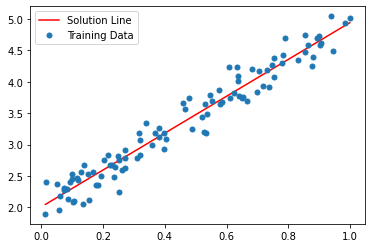

In [126]:
import matplotlib.pyplot as plt
a_predict = fit_results[0][0]
b_predict = fit_results[0][1]

plt.plot(x_train, b_predict*x_train + a_predict, 'r', label='Solution Line')
plt.plot(x_train, y_train, 'o', label='Training Data', markersize=5)
plt.legend()
plt.show()


### Problem 1.6

In [9]:
def eigen_data(n):
    X = np.random.randn(n, 3)
    matrices = np.reshape(X[:, [0, 1, 1, 2]], (n, 2, 2))
    y = np.array([np.max(np.linalg.eig(matrix)[0]) for matrix in matrices])
    return X, y

In [10]:
n_train, n_test = 100, 100
x_train, y_train = eigen_data(n_train)
x_test, y_test = eigen_data(n_test)

### Problem 1.7 (Exam Style)

## Part 2: Points in Many Dimensions

In [11]:
from math import gamma, sqrt

def gaussian_sample(n, d):
    mean = np.zeros(d)
    mean_distance = 2 * gamma((d + 1) / 2) / gamma(d / 2) if d < 200 else sqrt(2 * d)
    covariance = np.eye(d) / pow(mean_distance, 2)
    return np.random.multivariate_normal(mean, covariance, size=n)

In [12]:
def show_histogram(x, d):
    density, _, _ = plt.hist(x=x, bins='auto', density=True, rwidth=0.9)
    mean = np.mean(x)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Distance')
    plt.ylabel('Empirical Density')
    format_string = '{} dimension{}. Mean distance {:.2f}'
    plt.title(format_string.format(d, 's' if d > 1 else '', mean))

### Problem 2.1

### Problem 2.2

### Problem 2.3

### Problem 2.4